Hossam Hassan Mohammed 

Global Terrorism (Second Task at Sparks Foundation internship)

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Reading Data from google drive

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head(3)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  

[3 rows x 135 columns]

Check NaN value in the data

In [ ]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
print("Most Country have a Terrorism is: ", data["country_txt"].value_counts().index[0])
print("Most Region have a Terrorism is: ", data["region_txt"].value_counts().index[0])
print("The most years which terrorism occurred was among: ", data["iyear"].value_counts().index[:5].sort_values())

Most Country have a Terrorism is:  Iraq
Most Region have a Terrorism is:  Middle East & North Africa
The most years which terrorism occurred was among:  Int64Index([2013, 2014, 2015, 2016, 2017], dtype='int64')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


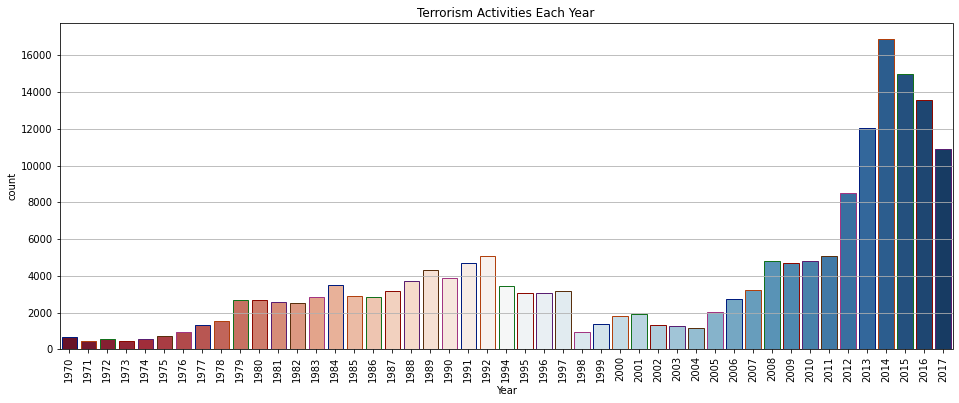

In [ ]:
plt.subplots(figsize=(16,6))
sns.countplot(data['iyear'], data=data, palette='RdBu',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.xlabel("Year")
plt.title('Terrorism Activities Each Year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


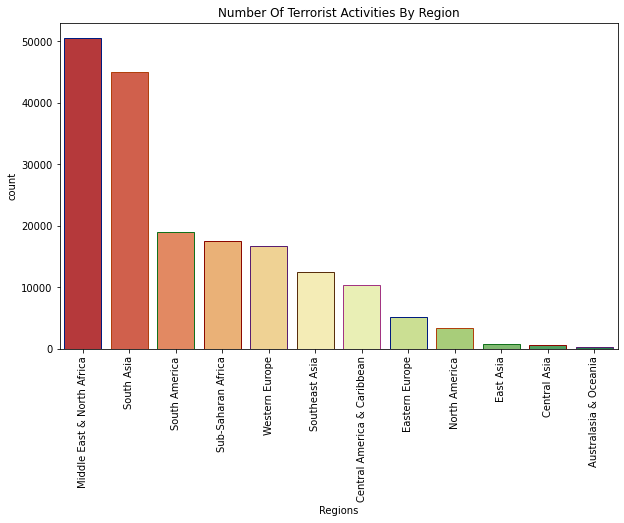

In [ ]:
plt.subplots(figsize=(10,6))
sns.countplot('region_txt',data=data,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order= data['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Regions")
plt.title('Number Of Terrorist Activities By Region')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


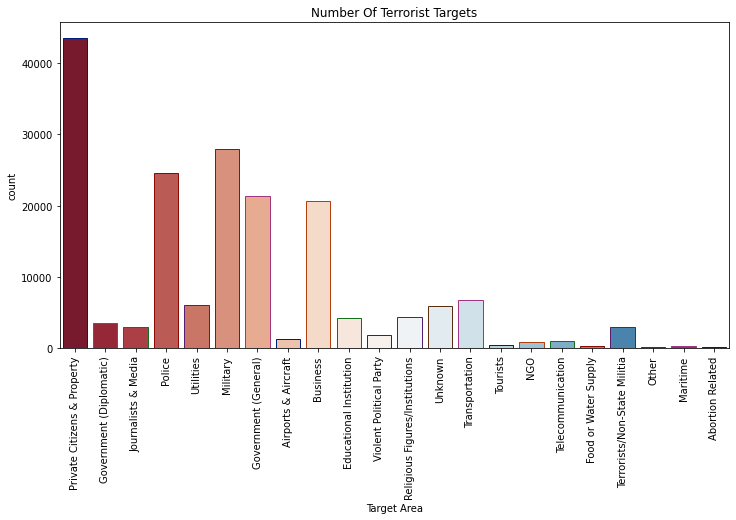

In [ ]:
plt.subplots(figsize=(12,6))
sns.countplot(data['targtype1_txt'], data=data, palette='RdBu',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel("Target Area")
plt.title('Number Of Terrorist Targets')
plt.show()

Text(0.5, 1.0, 'Successful & Failure Operation')

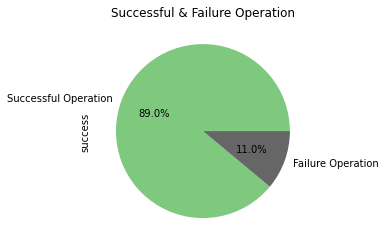

In [ ]:
data_copy = data.copy()
data_copy["success"] = data["success"].replace({1:"Successful Operation", 0:"Failure Operation"})
data_copy["success"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="Accent")
plt.title("Successful & Failure Operation")

In [ ]:
weapons_target = pd.concat([data["targtype1_txt"],data["weaptype1_txt"]],axis=1, names=["Weapons","Target"])
weapons_target.drop_duplicates().head(10)

targtype1_txt weaptype1_txt
0   Private Citizens & Property       Unknown
1       Government (Diplomatic)       Unknown
2           Journalists & Media       Unknown
3       Government (Diplomatic)    Explosives
4       Government (Diplomatic)    Incendiary
5                        Police      Firearms
7                     Utilities    Explosives
8                      Military    Incendiary
9          Government (General)    Incendiary
10                     Military    Explosives

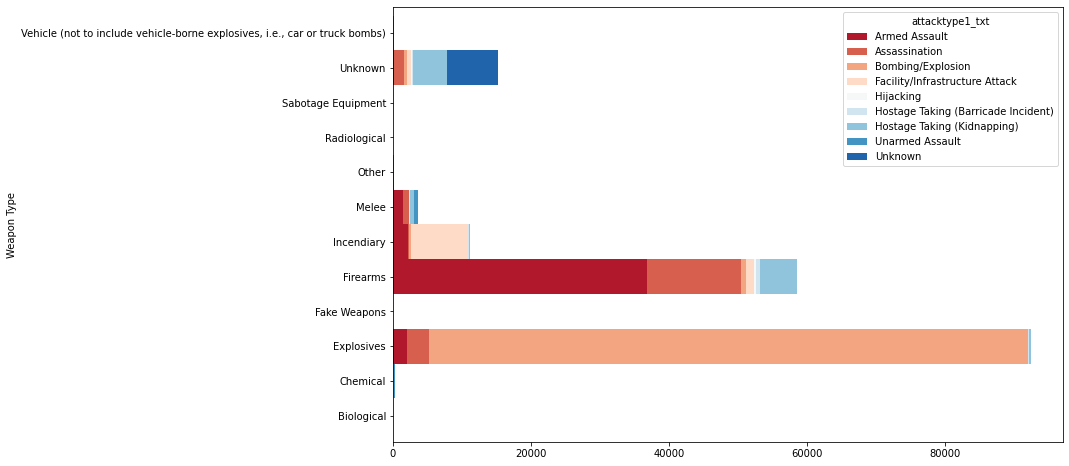

In [ ]:
pd.crosstab(data.weaptype1_txt,data.attacktype1_txt).plot.barh(stacked=True,width=1,color=sns.color_palette('RdBu',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.ylabel("Weapon Type")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


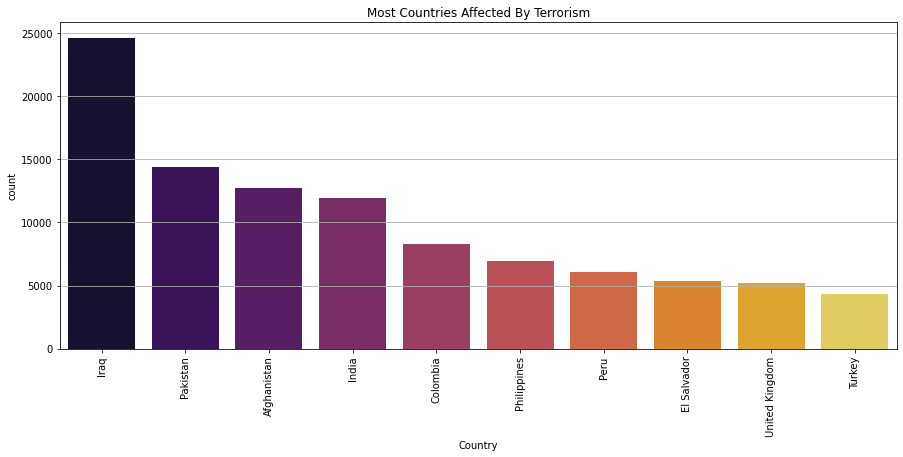

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('country_txt',data=data,palette='inferno',order=data["country_txt"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Most Countries Affected By Terrorism')
plt.xlabel("Country")
plt.grid(axis="y")
plt.show()

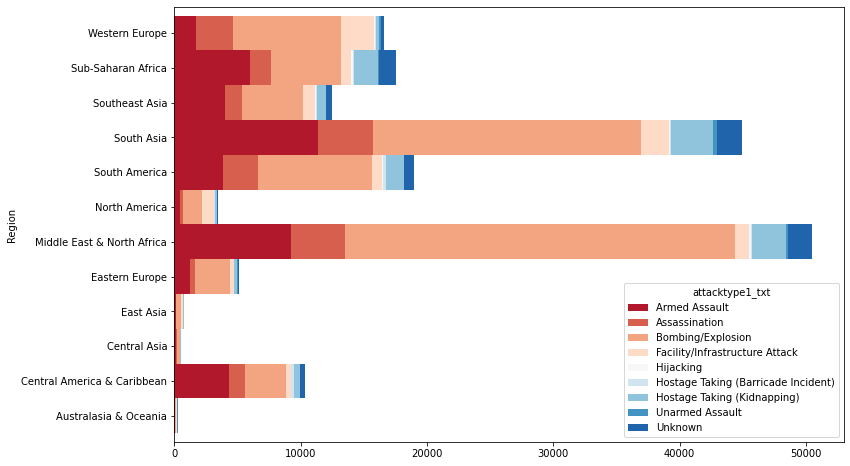

In [ ]:
pd.crosstab(data.region_txt,data.attacktype1_txt).plot.barh(stacked=True,width=1,color=sns.color_palette('RdBu',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.ylabel("Region")
plt.show()

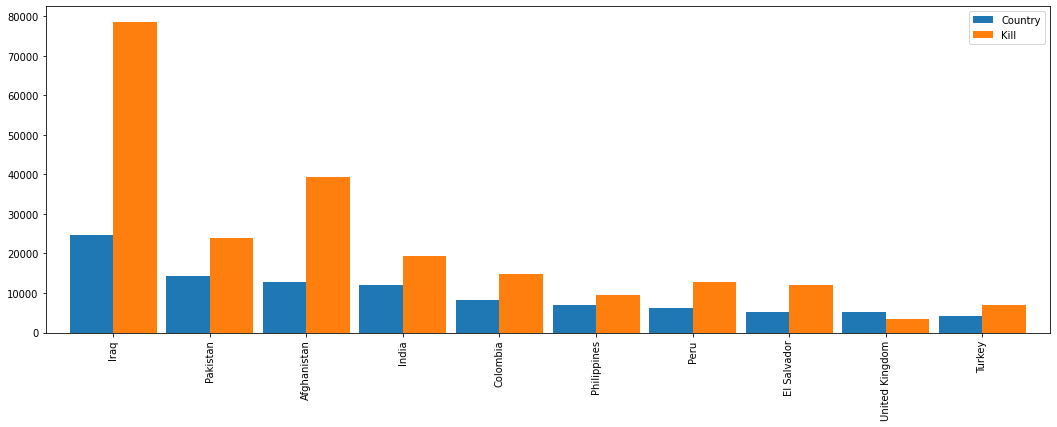

In [ ]:
country_data=data['country_txt'].value_counts()[:10].to_frame()
country_kill = data.groupby('country_txt')["nkill"].sum().to_frame()
country_data.merge(country_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.legend(["Country","Kill"])
plt.show()

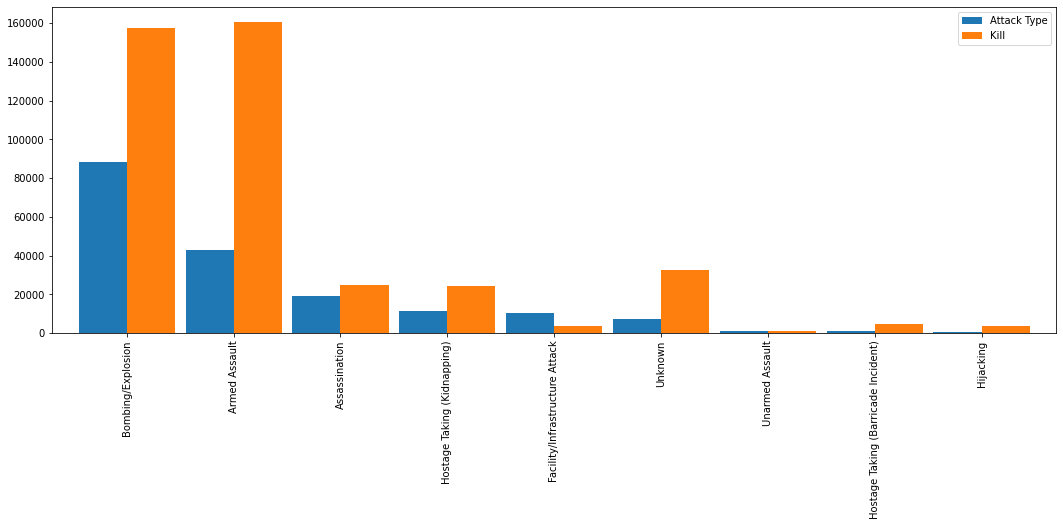

In [ ]:
attack_type = data["attacktype1_txt"].value_counts().to_frame()
attack_kill = data.groupby('attacktype1_txt')["nkill"].sum().to_frame()
attack_type.merge(attack_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.legend(["Attack Type","Kill"])
plt.show()

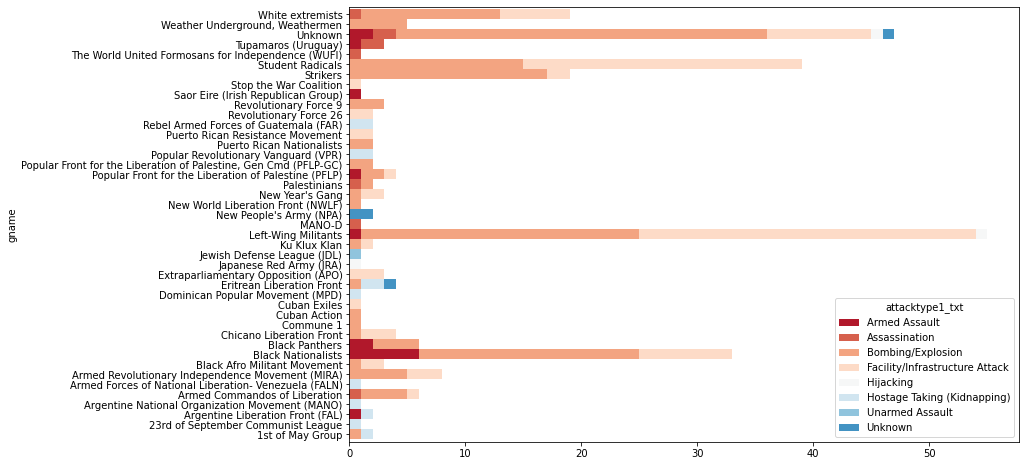

In [ ]:
pd.crosstab(data.gname[:300],data.attacktype1_txt).plot.barh(stacked=True,width=1,color=sns.color_palette('RdBu',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_geo(data,lat='latitude',lon='longitude', hover_name="eventid")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()